The data scientists at **BigMart** have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

In [0]:
#Load the Library  https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/

from google.colab import drive

drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
test='/content/drive/My Drive/DataSets/Test_bigmart.txt'
train='/content/drive/My Drive/DataSets/Train_bigmart.txt'


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np

In [0]:
train=pd.read_csv('/content/drive/My Drive/DataSets/Train_bigmart.txt')

test=pd.read_csv('/content/drive/My Drive/DataSets/Test_bigmart.txt')

Its generally a good idea to combine both train and test data sets into one, perform feature engineering and then divide them later again. This saves the trouble of performing the same steps twice on test and train. Lets combine them into a dataframe ‘data’ with a ‘source’ column specifying where each observation belongs.

In [0]:
train['source']='train'
test['source']='test'

In [0]:
data=pd.concat([train,test],ignore_index=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
data.shape

(14204, 13)

In [0]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [0]:
train.shape

(8523, 13)

In [0]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test


In [0]:
test.shape

(5681, 12)

Thus we can see that data has same #columns but rows equivalent to both test and train. One of the key challenges in any data set is missing values. Lets start by checking which columns contain missing values.

In [0]:
#number of unique values in each column

data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

Item_Outlet_Sales is the target variable and missing values are ones in the test set. So we need not worry about it. But we’ll impute the missing values in Item_Weight and Outlet_Size in the data cleaning section.

In [0]:
#basic statistics for numerical variables.
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [0]:
# Moving to nominal (categorical) variable, lets have a look at the number of unique values in each of them.

data.apply(lambda x: len(x.unique()))  #number of unique values in each column


Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

This tells us that there are 1559 products and 10 outlets/stores and **Item_Type** has 16 unique values. 

In [0]:
round((data.apply(lambda x:x.isnull().sum())/len(data))*100,2)

#missing values in Item_Outlet_Sales(which is the target variable)
#missing values in Item_Weight(17%),Outlet_Size (28%)

Item_Fat_Content              0.00
Item_Identifier               0.00
Item_MRP                      0.00
Item_Outlet_Sales            40.00
Item_Type                     0.00
Item_Visibility               0.00
Item_Weight                  17.17
Outlet_Establishment_Year     0.00
Outlet_Identifier             0.00
Outlet_Location_Type          0.00
Outlet_Size                  28.27
Outlet_Type                   0.00
source                        0.00
dtype: float64

In [0]:
data.dtypes=='object'

Item_Fat_Content              True
Item_Identifier               True
Item_MRP                     False
Item_Outlet_Sales            False
Item_Type                     True
Item_Visibility              False
Item_Weight                  False
Outlet_Establishment_Year    False
Outlet_Identifier             True
Outlet_Location_Type          True
Outlet_Size                   True
Outlet_Type                   True
source                        True
dtype: bool

In [0]:
#We can see that there are more than one representation of low fat and regular
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [0]:
data['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [0]:
data['Outlet_Identifier'].unique()  # we see there are 10 outlets

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [0]:
data['Outlet_Type'].unique()  ## #there are 3 types of super market and a grocry store type in the outlet_types

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [0]:
data['Outlet_Location_Type'].unique()  #  3 types of location

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [0]:
# Exclude the Item_Identifier and source which are not required

#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]


#Print frequency of categories
for col in categorical_columns:
    print ('Frequency of Categories for varible: ' , len(col))
    print (data[col].value_counts())

Frequency of Categories for varible:  16
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Frequency of Categories for varible:  9
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Frequency of Categories for varible:  20
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Frequency of Categories for varible:  11
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Frequency of Categories for varible:  11
Superm

# Data Cleaning
This step typically involves imputing missing values and treating outliers.

**Imputing Missing Values**

We found two variables with missing values – Item_Weight and Outlet_Size. Lets impute the former by the average weight of the particular item. This can be done as:

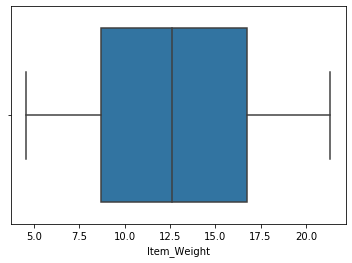

In [0]:
sns.boxplot(data['Item_Weight'])

In [0]:
round(np.mean(data['Item_Weight']),3)

12.793

In [0]:
#Replacing the missing values with the mean
data['Item_Weight'].fillna(12.8,inplace=True)

In [0]:
data['Item_Weight'].isnull().sum() # Ensure no missing values

0

This confirms that the column has no missing values now. Lets impute Outlet_Size with the mode of the **Outlet_Size** for the particular type of outlet.

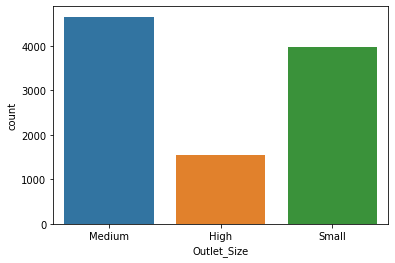

In [0]:
sns.countplot(data['Outlet_Size'])

In [0]:
#imputing missing values with the mode

data['Outlet_Size'].fillna('Medium',inplace=True)

In [0]:
data['Outlet_Size'].isnull().sum()

0

This confirms that there are no missing values in the data. Lets move on to feature engineering now.

# Feature Engineering
We explored some nuances in the data in the data exploration section. Lets move on to resolving them and making our data ready for analysis. We will also create some new variables using the existing ones in this section.

**Step 1: Consider combining Outlet_Type**

Analyze the mean sales by type of store. If they have similar sales, then keeping them separate won’t help much.

In [0]:
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


This shows significant difference between them and we’ll leave them as it is. Note that this is just one way of doing this, you can perform some other analysis in different situations and also do the same for other features.

**Step 2: Modify Item_Visibility**

We noticed that the minimum value here is 0, which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that product.

In [0]:
## mean value for the item visibility excluding the zero values
x=data['Item_Visibility'].where(data['Item_Visibility']!=0)
np.mean(x)

0.07030343626048803

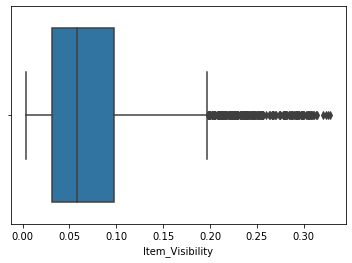

In [0]:
sns.boxplot(x)

In [0]:
data['Item_Visibility'].replace(0,0.0703)

0        0.016047
1        0.019278
2        0.016760
3        0.070300
4        0.070300
           ...   
14199    0.013496
14200    0.142991
14201    0.073529
14202    0.070300
14203    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64

In [0]:
data['Item_Visibility'].isnull().sum()  ## So we can see that there are no values which are zero.

0

We hypothesized that the products with higher visibility are likely to sell more. But along with comparing products on absolute terms, we should look at the visibility of the product in that particular store as compared to the mean visibility of that product across all stores. This will give some idea about how much importance was given to that product in a store as compared to other stores. We can use the ‘**visibility_avg**’ variable made above to achieve this.

In [0]:
#creating a mean visibility column

data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/(0.07), axis=1)

In [0]:
data['Outlet_Establishment_Year'].describe()  ## the new variable has been successfully created

count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

**Step 3: Create a broad category of Type of Item**

we saw that the **Item_Type** variable has 16 categories which might prove to be very useful in analysis. So its a good idea to combine them. One way could be to manually assign a new category to each. But there’s a catch here. If you look at the **Item_Identifier**, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. So I’ve used the **Item_Identifier** variable to create a new column:

In [0]:
# Get the first two characters of ID:
data['Item_Type_Combined']=data['Item_Identifier'].apply(lambda x: x[0:2])

#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [0]:
data['Item_Type_Combined'].head()

0              Food
1            Drinks
2              Food
3              Food
4    Non-Consumable
Name: Item_Type_Combined, dtype: object

We can combine categories based on sales. The ones with high average sales could be combined together. 

In [0]:
data['Item_Type_SalesCombined']=data['Item_Outlet_Sales'].apply(lambda x: x[0:2]) ## try this later****

TypeError: ignored

**Step 4: Determine the years of operation of a store**

We wanted to make a new column depicting the years of operation of a store. This can be done as:

In [0]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

This shows stores which are min 4- max of 28 years old. Notice I’ve used 2013. Why? Read the problem statement carefully and you’ll know.

**Step 5: Modify categories of Item_Fat_Content**

We found typos and difference in representation in categories of **Item_Fat_Content** variable. This can be corrected as:

In [0]:
#Change categories of low fat:

print ('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [0]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

**Step 6: Numerical and One-Hot Coding of Categorical variables**

Since scikit-learn accepts only numerical variables, I converted all categories of nominal variables into numeric types. Also, I wanted Outlet_Identifier as a variable as well. So I created a new variable ‘Outlet’ same as Outlet_Identifier and coded that. Outlet_Identifier should remain as it is, because it will be required in the submission file.

In [0]:
# coding all categorical variables as numeric using ‘LabelEncoder’ from sklearn’s preprocessing module.

#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

**One-Hot-Coding** refers to creating dummy variables, one for each category of a categorical variable. For example, the Item_Fat_Content has 3 categories – ‘Low Fat’, ‘Regular’ and ‘Non-Edible’. One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers – 0 (if the category is not present) and 1(if category is present). This can be done using ‘get_dummies’ function of Pandas.

In [0]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [0]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

Here we can see that all variables are now float and each category has a new variable. Lets look at the 3 columns formed from Item_Fat_Content.

In [0]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


**Step 7: Exporting Data**

Final step is to convert data back into train and test data sets. Its generally a good idea to export both of these as modified data sets so that they can be re-used for multiple sessions. This can be achieved using following code:

In [0]:
##Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# 4. Model Building

Now that we have the data ready, its time to start making predictive models. we are getting the prediction from 6 models including linear regression, decision tree and random forest